In [1]:
# Import log json file and view Gantt chart of the log
import json
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:

def graphResults(logs, labels, ref, title, subtitle):
    '''Graph the results'''

    i=0
    for log in logs:
        if labels:
            plt.plot(log, label=labels[i])
        else:
            plt.plot(log)
        i+=1
    
    # Horizontal line for reference
    plt.axhline(y=ref, color='red', linestyle='dashed')
    
    # Add labels
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(subtitle)
    plt.suptitle(title)
    # Add legend
    plt.legend()
    #plt.show()

    # Save the figure
    timestamp = time()
    plt.savefig(title+str(timestamp)+'.png')

def getDataGantt(logs, title):
    n = len(logs)
    #tt, s, x = getCycleTime(t, l, L, W)
    dflist = []

    j = 0
    for log in logs: # Node logs
        i = 0
        for iterlog in log: # Operations
            if i > 50:
                break
            start = iterlog['start']
            stop = iterlog['end']
            if j==0 and i==0:
                offset = start
            start = start - offset
            stop = stop - offset
            #start = s[i,j]
            #stop = start + t[j]
            dflist.append(dict(Task="Iter %s" % i, Start=start, Finish=stop, Resource="Node %s" % j))
            i += 1
        j += 1
    df = pd.DataFrame(dflist)
    df['delta'] = df['Finish'] - df['Start']
    # Export df to csv
    #df.to_csv(title+'.csv')

    fig = px.timeline(df, x_start="Start", x_end="Finish", y="Resource", color="Task")
    fig.update_yaxes(autorange="reversed") 

    fig.layout.xaxis.type = 'linear'
    for d in fig.data:
        filt = df['Task'] == d.name
        d.x = df[filt]['delta'].tolist()

    fig.update_layout(title_text=title)
    return fig


In [3]:
# Import log file logs_lambert1710*.json
LW_titles = ['full', 'MT', 'block2', 'SLEM', 'MaxFiedler']
logs = []
for title in LW_titles:
    log = []
    for node in range(10):
        logname = 'logs_wta'+str(node)+'_'+title+'.json'
        with open(logname) as f:
            data = json.load(f)
        log.append(data)
    logs.append(log)

# Data is a list of lists with the following structure:
# data = [[node1_1, node1_2, ... ],[node2_1, node2_2, ...],...]
# where log1 is a dictionary with the following structure:
# log1 = {'start': 0, 'end': 0, 'value': 0, 'time': 0}



In [7]:
logs[0]


[[{'start': 1711405319.7415404,
   'end': 1711405319.7423196,
   'time': 0.0007791519165039062,
   'value': 91.15080685122057},
  {'start': 1711405324.947014,
   'end': 1711405324.9479845,
   'time': 0.0009703636169433594,
   'value': 64.36747975415106},
  {'start': 1711405324.9497752,
   'end': 1711405324.950493,
   'time': 0.0007178783416748047,
   'value': 39.70149812615318},
  {'start': 1711405324.9508727,
   'end': 1711405324.951592,
   'time': 0.0007193088531494141,
   'value': 27.016208799315656},
  {'start': 1711405324.9519527,
   'end': 1711405324.9526684,
   'time': 0.0007157325744628906,
   'value': 21.22101932224606},
  {'start': 1711405324.953049,
   'end': 1711405324.9537644,
   'time': 0.0007154941558837891,
   'value': 17.870134709773033},
  {'start': 1711405324.9541216,
   'end': 1711405324.954842,
   'time': 0.0007205009460449219,
   'value': 15.650109357492818},
  {'start': 1711405324.9551945,
   'end': 1711405324.9559007,
   'time': 0.0007061958312988281,
   'value'

In [8]:
fig = getDataGantt(logs[0], "Parallel WTA Full")
fig.show()

In [6]:
fig = getDataGantt(logs[1], "Parallel WTA MT")
fig.show()

In [9]:
# Block
fig = getDataGantt(logs[2], "Parallel WTA Block")
fig.show()


In [10]:
# SLEM
fig = getDataGantt(logs[3], "Parallel WTA SLEM")
fig.show()

In [11]:
# MaxFiedler
fig = getDataGantt(logs[4], "Parallel WTA MaxFiedler")
fig.show()

In [20]:
# Plot the value entry in last log for each of the three methods
# Against the time delta 
# Get the last value of each log
ref=8.629087973826826
values = []
time_deltas = []
for log in logs:
    start = log[0][1]['start']
    values.append([np.log10(e['value']-ref) for e in log[0][1:]])
    time_deltas.append([e['end']-start for e in log[0][1:]])


In [19]:
start = logs[0][0][1]['start']
for i in range(1,50):
    e = logs[0][0][i]
    print(e['value'], e['end']-start)

64.36747975415106 0.0009703636169433594
39.70149812615318 0.00347900390625
27.016208799315656 0.0045778751373291016
21.22101932224606 0.005654335021972656
17.870134709773033 0.006750345230102539
15.650109357492818 0.007827997207641602
14.20879968196428 0.008886575698852539
13.139822998444442 0.009996891021728516
12.368103130031196 0.011039018630981445
11.790004477693259 0.012102365493774414
11.370014877092741 0.013112783432006836
11.007596564529608 0.014128684997558594
10.700653804288244 0.015149354934692383
10.449578683094005 0.016191482543945312
10.243019841076427 0.017209291458129883
10.069538729004805 0.01822948455810547
9.910069674816715 0.019278287887573242
9.758861745266934 0.020282745361328125
9.62056138899404 0.021286725997924805
9.493202965377266 0.022282838821411133
9.386444011493936 0.023283004760742188
9.293816889177027 0.02429485321044922
9.2170839671089 0.02526569366455078
9.153116249897536 0.026242971420288086
9.099121076733674 0.027244091033935547
9.055712654283163 0.0

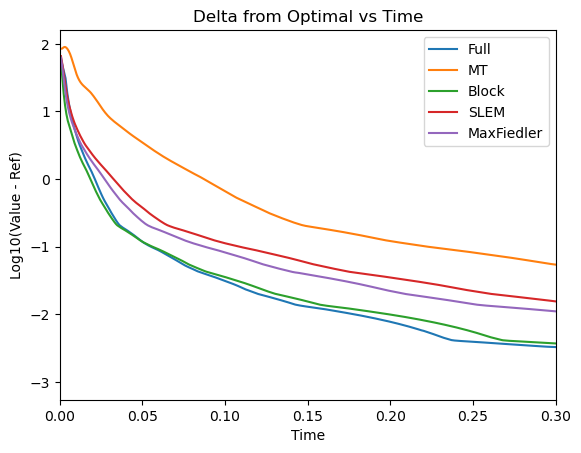

In [21]:
ref=8.629087973826826
plt.plot(time_deltas[0], values[0], label='Full')
plt.plot(time_deltas[1], values[1], label='MT')
plt.plot(time_deltas[2], values[2], label='Block')
plt.plot(time_deltas[3], values[3], label='SLEM')
plt.plot(time_deltas[4], values[4], label='MaxFiedler')
#plt.axhline(y=ref, color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Log10(Value - Ref)')

# Only display x-axis less than 0.2
plt.xlim(0, 0.3)
plt.title('Delta from Optimal vs Time')
plt.legend()

plt.show()

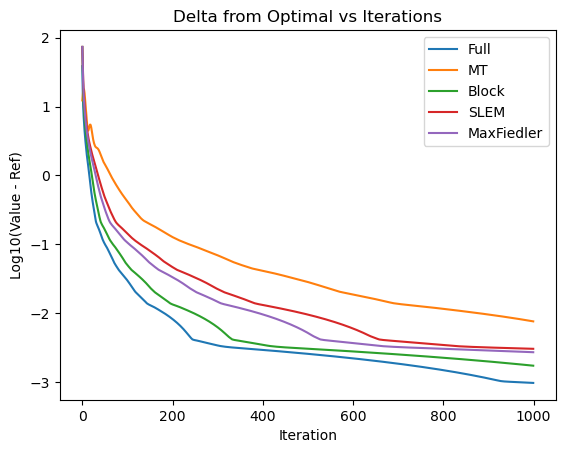

In [12]:
# Plot vs Iterations
plt.plot(values[0], label='Full')
plt.plot(values[1], label='MT')
plt.plot(values[2], label='Block')
plt.plot(values[3], label='SLEM')
plt.plot(values[4], label='MaxFiedler')
#plt.axhline(y=ref, color='red', linestyle='dashed')
plt.xlabel('Iteration')
plt.ylabel('Log10(Value - Ref)')

# Only display x-axis less than 0.2
#plt.xlim(0, 0.3)
plt.title('Delta from Optimal vs Iterations')
plt.legend()

plt.show()

In [22]:
# Find the time taken for each node and its standard deviation
# Create a dataframe with the times
# With a column for each node
times = pd.DataFrame()
for i, nodelog in enumerate(logs[0]):
    times['Node'+str(i)] = [e['end']-e['start'] for e in nodelog[1:]]

times.describe()
    
            


,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,9.990000e+02
mean,0.000711,0.000010,0.000011,0.000010,0.000010,0.000012,0.000011,1.036226e-05,0.000011,1.039042e-05
std,0.000009,0.000002,0.000003,0.000005,0.000002,0.000018,0.000002,9.798430e-07,0.000001,8.761444e-07
min,0.000697,0.000009,0.000010,0.000010,0.000010,0.000010,0.000010,9.536743e-06,0.000010,9.536743e-06
25%,0.000707,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,1.001358e-05,0.000010,1.001358e-05
50%,0.000710,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,1.025200e-05,0.000010,1.025200e-05
75%,0.000713,0.000010,0.000011,0.000010,0.000010,0.000010,0.000010,1.025200e-05,0.000010,1.025200e-05
max,0.000970,0.000080,0.000086,0.000171,0.000082,0.000552,0.000028,2.574921e-05,0.000021,1.764297e-05


In [23]:
# Find the time for the communication between nodes
# Using MT as an example

# Create a dataframe with the times
# With a column for each node
commtimes = pd.DataFrame()
for i in range(1,10):
    # Find the difference between start on node i and end on node i-1
    commtimes['Node'+str(i)] = [logs[1][i][j]['start']-logs[1][i-1][j]['end'] for j in range(1,1000)]

commtimes.describe()

,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,Node9
count,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.000033,1.137870e-05,0.000012,0.000013,0.000013,0.000013,0.000011,0.000011,0.000009
std,0.000003,9.447591e-07,0.000016,0.000038,0.000061,0.000076,0.000004,0.000001,0.000002
min,0.000031,1.025200e-05,0.000010,0.000010,0.000010,0.000010,0.000010,0.000009,0.000008
25%,0.000032,1.096725e-05,0.000011,0.000011,0.000011,0.000010,0.000010,0.000010,0.000009
50%,0.000032,1.120567e-05,0.000011,0.000011,0.000011,0.000011,0.000011,0.000010,0.000009
75%,0.000033,1.144409e-05,0.000011,0.000011,0.000011,0.000011,0.000011,0.000011,0.000009
max,0.000066,3.218651e-05,0.000505,0.001219,0.001937,0.002419,0.000103,0.000029,0.000065


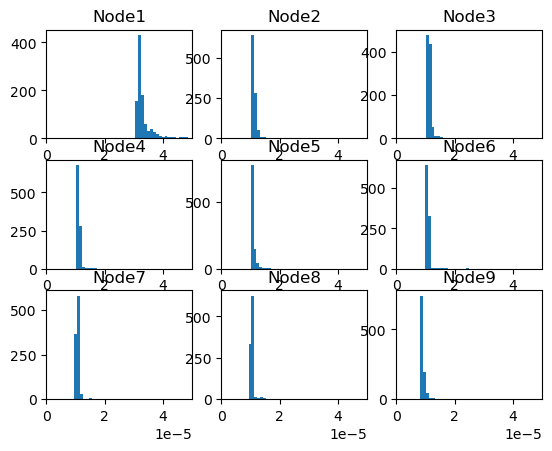

In [30]:
# Plot a histogram of the communication times for each node 
# as subplots
fig, axs = plt.subplots(3,3)
binwidth = 1e-6
for i in range(1,10):
    ax = axs[(i-1)//3, (i-1)%3]
    # Use common bin size
    dat = commtimes['Node'+str(i)]
    ax.hist(dat, bins=np.arange(min(dat), max(dat) + binwidth, binwidth))

    #ax.hist(commtimes['Node'+str(i)], bins=20)
    # Get common x-axis
    ax.set_xlim(0, 5e-5)
    ax.set_title('Node'+str(i))
plt.show()